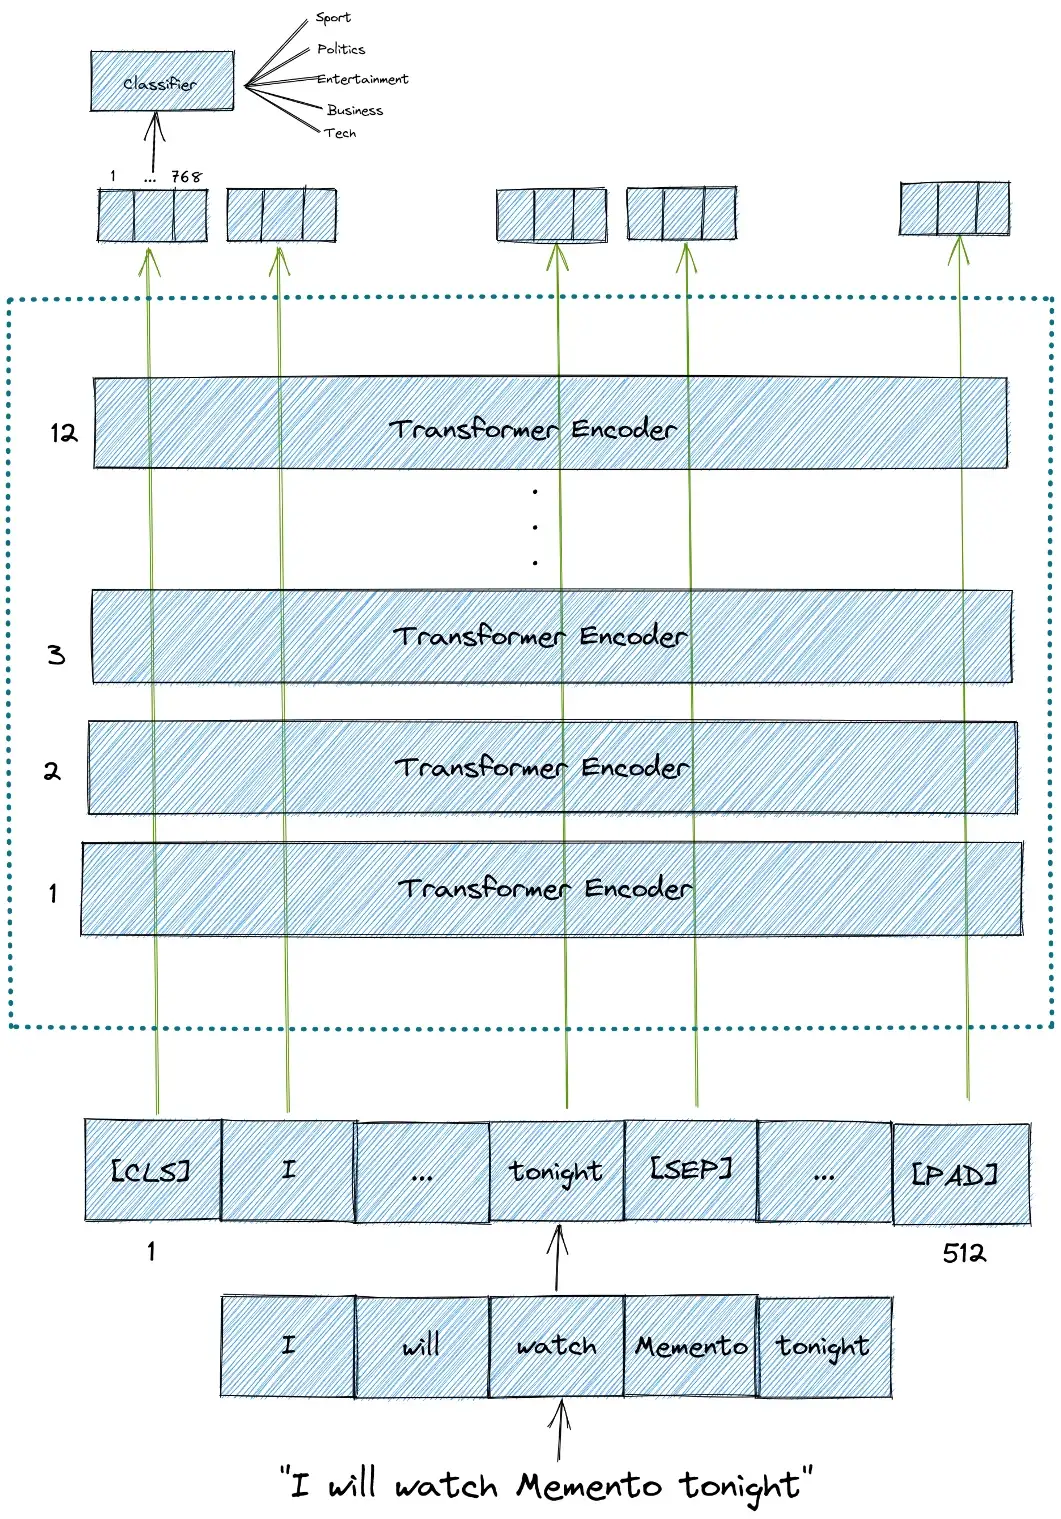

## Dataset walkthrough

In [1]:
import pandas as pd

In [2]:
datapath = 'bbc-text.csv'
df = pd.read_csv(datapath)
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<AxesSubplot:xlabel='category'>

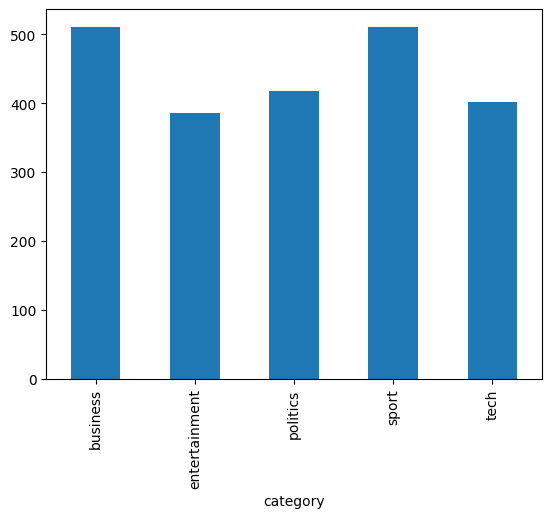

In [3]:
df.groupby(['category']).size().plot.bar()

In [4]:
from transformers import BertTokenizer

e:\Anaconda3\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'I will watch Memeto tonight'

bert_input = tokenizer(example_text, padding='max_length', max_length=10, truncation=True, return_tensors='pt')

Here is the explanation of `BertTokenizer` parameters above:

- `padding` : to pad each sequence to the maximum length that you specify.
- `max_length` : the maximum length of each sequence. In this example we use 10, but for our actual dataset we will use 512, which is the maximum length of a sequence allowed for BERT.
- `truncation` : if True, then the tokens in each sequence that exceed the maximum length will be truncated.
- `return_tensors` : the type of tensors that will be returned. Since we’re using **Pytorch**, then we use `pt`. If you use **Tensorflow**, then you need to use `tf`.

In [9]:
bert_input

{'input_ids': tensor([[  101,   146,  1209,  2824,  2508, 11006,  1186,  3568,   102,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])}

In [10]:
print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

tensor([[  101,   146,  1209,  2824,  2508, 11006,  1186,  3568,   102,     0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]])


In [15]:
tokenizer(['Hello how are you', 'I am fine'], padding='max_length', max_length=10, truncation=True, return_tensors='pt')

{'input_ids': tensor([[ 101, 8667, 1293, 1132, 1128,  102,    0,    0,    0,    0],
        [ 101,  146, 1821, 2503,  102,    0,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]])}

## Explain the ouput

1. The first row is `input_ids` , which is the id representation of each token. We can actually decode these input ids into the actual tokens as follows:

In [13]:
example_text = tokenizer.decode(bert_input['input_ids'][0])

print(example_text)

[CLS] I will watch Memeto tonight [SEP] [PAD]


As you can see, the `BertTokenizer` takes care of all of the necessary transformations of the input text such that it’s ready to be used as an input for our BERT model. It adds **[CLS]**, **[SEP]**, and **[PAD]** tokens automatically. <font color='green'>**Since we specified the maximum length to be 10**, then there are only two **[PAD]** tokens at the end.</font>

----

2. The second row is `token_type_ids` , which is a binary mask that identifies in which sequence a token belongs. If we only have a single sequence, then all of the token type ids will be 0. For a text classification task, `token_type_ids` is an optional input for our BERT model.

___

3. The third row is `attention_mask` , which is a binary mask that identifies whether a token is a real word or just padding. If the token contains **[CLS]**, **[SEP]**, or any real word, then the mask would be 1. Meanwhile, if the token is just padding or **[PAD]**, then the mask would be 0.

$\to$ If you have datasets from different languages, you might want to use `bert-base-multilingual-cased`.

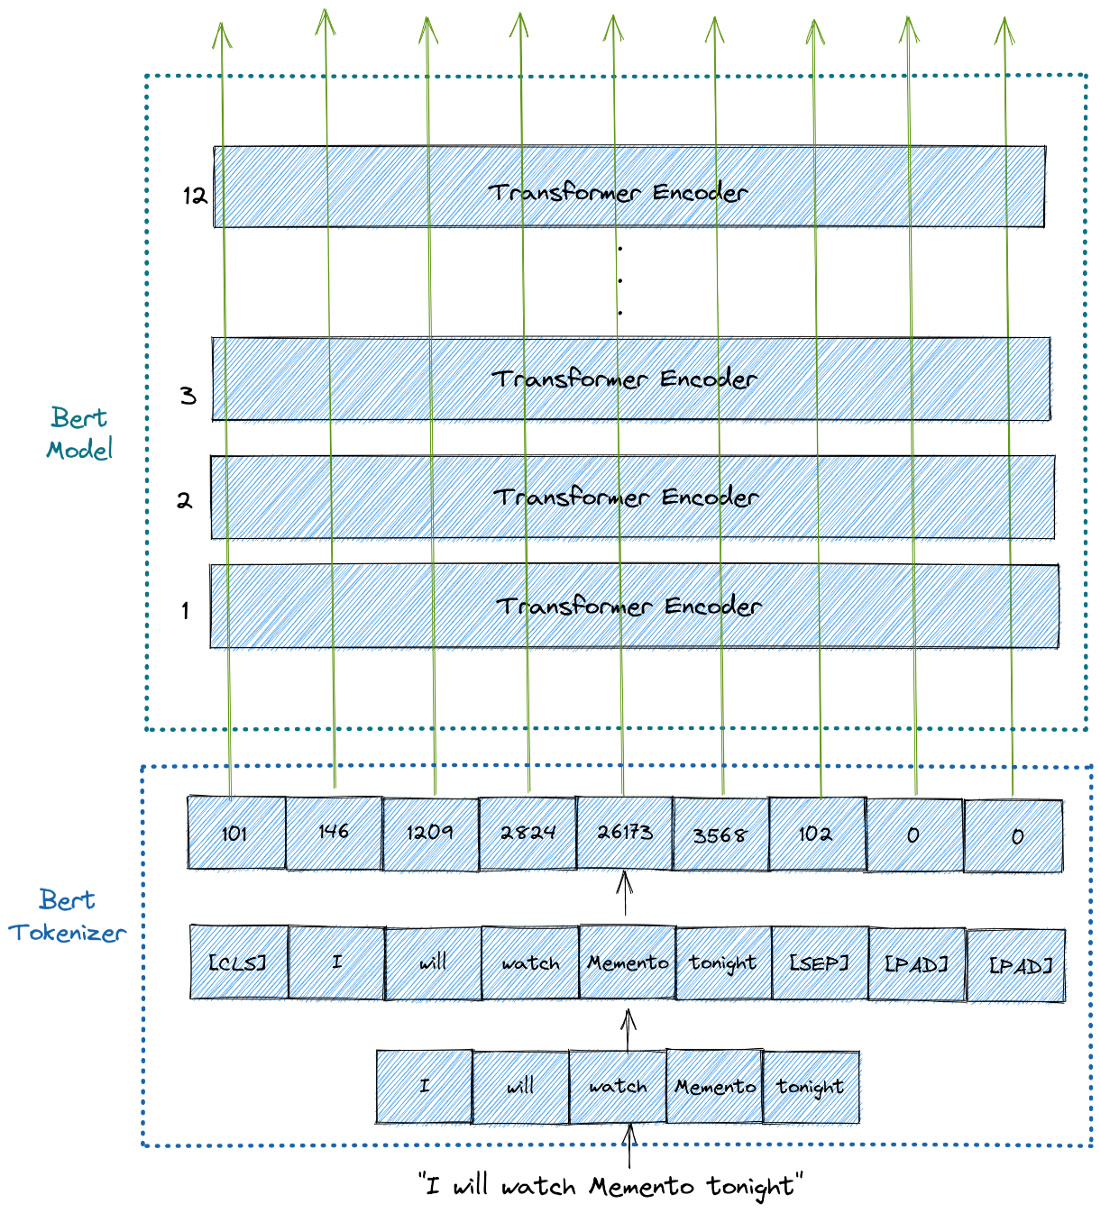

## Dataset Class

In [16]:
from dataset import Dataset

In [18]:
import numpy as np

np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

1780 222 223


## Model Building